# Calculate CAA scavenging rates

Dissolved trace metal data from Manuel Colombo, particulate trace metal data from Jingxuan Li.

Date: 05-12-2017

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import stations
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

In [51]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
CAA1 = stations.CAA1()
CAA2 = stations.CAA2()
CAA3 = stations.CAA3()
CAA4 = stations.CAA4()
CAA5 = stations.CAA5()
CAA6 = stations.CAA6()
CAA7 = stations.CAA7()
CAA8 = stations.CAA8()
CAA9 = stations.CAA9()
CB1 = stations.CB1()
CB2 = stations.CB2()
CB3 = stations.CB3()
CB4 = stations.CB4()
BB1 = stations.BB1()
BB2 = stations.BB2()
BB3 = stations.BB3()
K1 = stations.K1()
LS2 = stations.LS2()

Station locations:

In [9]:
names = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
         'CB1', 'CB2', 'CB3', 'CB4', 'BB1', 'BB2', 'BB3', 'K1', 'LS2']
lons = [CAA1.lon, CAA2.lon, CAA3.lon, CAA4.lon, CAA5.lon, CAA6.lon, CAA7.lon, CAA8.lon, CAA9.lon, \
        CB1.lon, CB2.lon, CB3.lon, CB4.lon, BB1.lon, BB2.lon, BB3.lon, K1.lon, LS2.lon]
lats = [CAA1.lat, CAA2.lat, CAA3.lat, CAA4.lat, CAA5.lat, CAA6.lat, CAA7.lat, CAA8.lat, CAA9.lat, \
        CB1.lat, CB2.lat, CB3.lat, CB4.lat, BB1.lat, BB2.lat, BB3.lat, K1.lat, LS2.lat]

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


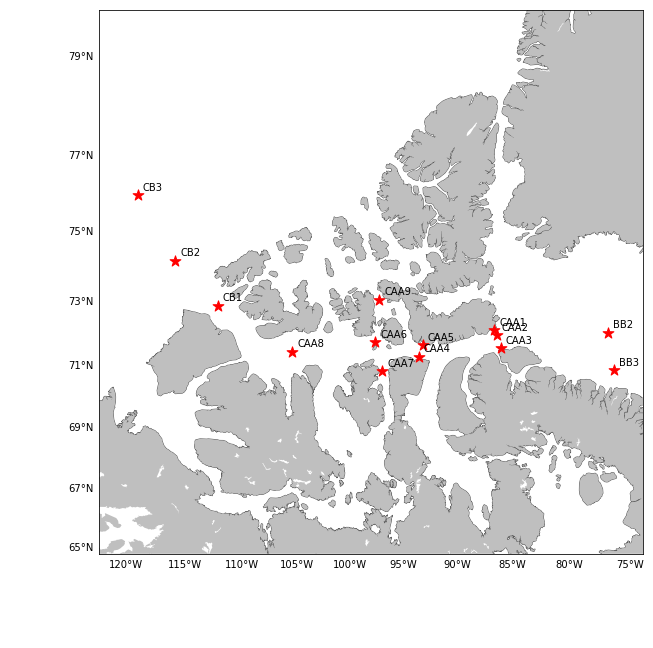

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
proj=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -98, resolution='i', width=2.25e6, height=2.25e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.fillcontinents(color=[0.75, 0.75, 0.75], lake_color=None, zorder=2) 
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(lons, lats)
 
proj.scatter(x, y, marker='*',s=130,zorder=3, c='r')

for i, (X, Y) in enumerate(zip(x, y), start=1):
    ax.annotate(names[i-1], (X,Y), xytext=(5, 5), textcoords='offset points')

# plot profiles at the same stations for particulate and dissolved:

9 CAA stations:

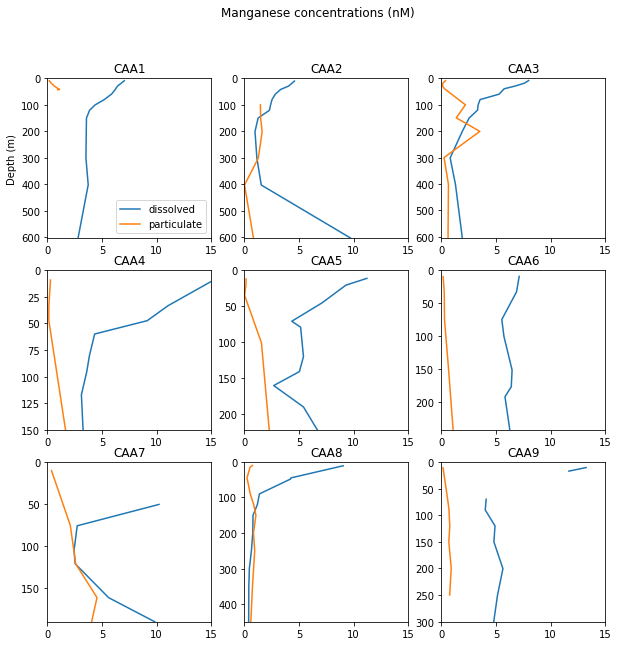

In [42]:
# Setup figure:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Manganese concentrations (nM)')
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax9 = plt.subplot2grid((3, 3), (2, 2))

ax1.invert_yaxis()
ax1.set_title('CAA1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CAA1.depth), 0])
ax1.set_xlim([0, 15])

ax2.invert_yaxis()
ax2.set_title('CAA2')
ax2.set_ylim([max(CAA2.depth), 0])
ax2.set_xlim([0, 15])

ax3.invert_yaxis()
ax3.set_title('CAA3')
ax3.set_ylim([max(CAA3.depth), 0])
ax3.set_xlim([0, 15])

ax4.invert_yaxis()
ax4.set_title('CAA4')
ax4.set_ylim([max(CAA4.depth), 0])
ax4.set_xlim([0, 15])

ax5.invert_yaxis()
ax5.set_title('CAA5')
ax5.set_ylim([max(CAA5.depth), 0])
ax5.set_xlim([0, 15])

ax6.invert_yaxis()
ax6.set_title('CAA6')
ax6.set_ylim([max(CAA6.depth), 0])
ax6.set_xlim([0, 15])

ax7.invert_yaxis()
ax7.set_title('CAA7')
ax7.set_ylim([max(CAA7.depth), 0])
ax7.set_xlim([0, 15])

ax8.invert_yaxis()
ax8.set_title('CAA8')
ax8.set_ylim([max(CAA8.depth), 0])
ax8.set_xlim([0, 15])

ax9.invert_yaxis()
ax9.set_title('CAA9')
ax9.set_ylim([max(CAA9.depth), 0])
ax9.set_xlim([0, 15])

ax1.plot(CAA1.dMn, CAA1.depth,label='dissolved')
ax1.plot([i/1000 for i in CAA1.pMn], CAA1.pdepth,label='particulate')
ax2.plot(CAA2.dMn, CAA2.depth)
ax2.plot([i/1000 for i in CAA2.pMn], CAA2.pdepth,label='particulate')
ax3.plot(CAA3.dMn, CAA3.depth)
ax3.plot([i/1000 for i in CAA3.pMn], CAA3.pdepth,label='particulate')
ax4.plot(CAA4.dMn, CAA4.depth)
ax4.plot([i/1000 for i in CAA4.pMn], CAA4.pdepth,label='particulate')
ax5.plot(CAA5.dMn, CAA5.depth)
ax5.plot([i/1000 for i in CAA5.pMn], CAA5.pdepth,label='particulate')
ax6.plot(CAA6.dMn, CAA6.depth)
ax6.plot([i/1000 for i in CAA6.pMn], CAA6.pdepth,label='particulate')
ax7.plot(CAA7.dMn, CAA7.depth)
ax7.plot([i/1000 for i in CAA7.pMn], CAA7.pdepth,label='particulate')
ax8.plot(CAA8.dMn, CAA8.depth)
ax8.plot([i/1000 for i in CAA8.pMn], CAA8.pdepth,label='particulate')
ax9.plot(CAA9.dMn, CAA9.depth)
ax9.plot([i/1000 for i in CAA9.pMn], CAA9.pdepth,label='particulate')

ax1.legend(loc=4)

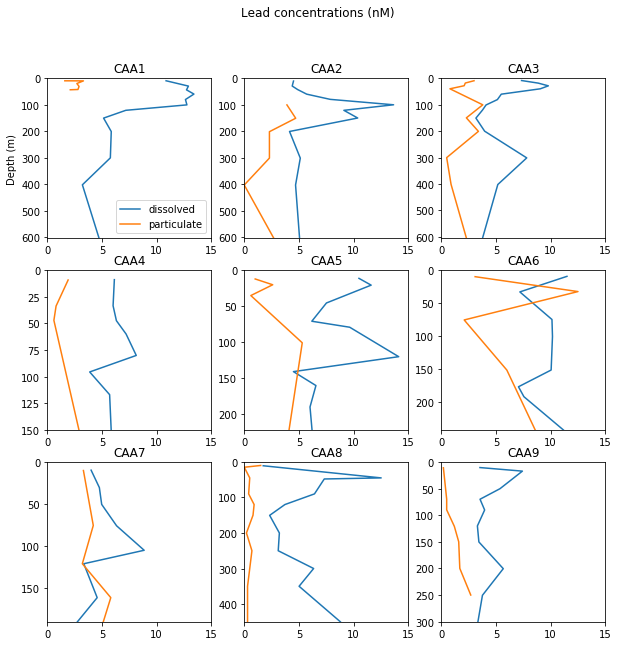

In [43]:
# Setup figure:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Lead concentrations (nM)')
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax9 = plt.subplot2grid((3, 3), (2, 2))

ax1.invert_yaxis()
ax1.set_title('CAA1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CAA1.depth), 0])
ax1.set_xlim([0, 15])

ax2.invert_yaxis()
ax2.set_title('CAA2')
ax2.set_ylim([max(CAA2.depth), 0])
ax2.set_xlim([0, 15])

ax3.invert_yaxis()
ax3.set_title('CAA3')
ax3.set_ylim([max(CAA3.depth), 0])
ax3.set_xlim([0, 15])

ax4.invert_yaxis()
ax4.set_title('CAA4')
ax4.set_ylim([max(CAA4.depth), 0])
ax4.set_xlim([0, 15])

ax5.invert_yaxis()
ax5.set_title('CAA5')
ax5.set_ylim([max(CAA5.depth), 0])
ax5.set_xlim([0, 15])

ax6.invert_yaxis()
ax6.set_title('CAA6')
ax6.set_ylim([max(CAA6.depth), 0])
ax6.set_xlim([0, 15])

ax7.invert_yaxis()
ax7.set_title('CAA7')
ax7.set_ylim([max(CAA7.depth), 0])
ax7.set_xlim([0, 15])

ax8.invert_yaxis()
ax8.set_title('CAA8')
ax8.set_ylim([max(CAA8.depth), 0])
ax8.set_xlim([0, 15])

ax9.invert_yaxis()
ax9.set_title('CAA9')
ax9.set_ylim([max(CAA9.depth), 0])
ax9.set_xlim([0, 15])

ax1.plot(CAA1.dPb, CAA1.depth,label='dissolved')
ax1.plot(CAA1.pPb, CAA1.pdepth,label='particulate')
ax2.plot(CAA2.dPb, CAA2.depth)
ax2.plot(CAA2.pPb, CAA2.pdepth,label='particulate')
ax3.plot(CAA3.dPb, CAA3.depth)
ax3.plot(CAA3.pPb, CAA3.pdepth,label='particulate')
ax4.plot(CAA4.dPb, CAA4.depth)
ax4.plot(CAA4.pPb, CAA4.pdepth,label='particulate')
ax5.plot(CAA5.dPb, CAA5.depth)
ax5.plot(CAA5.pPb, CAA5.pdepth,label='particulate')
ax6.plot(CAA6.dPb, CAA6.depth)
ax6.plot(CAA6.pPb, CAA6.pdepth,label='particulate')
ax7.plot(CAA7.dPb, CAA7.depth)
ax7.plot(CAA7.pPb, CAA7.pdepth,label='particulate')
ax8.plot(CAA8.dPb, CAA8.depth)
ax8.plot(CAA8.pPb, CAA8.pdepth,label='particulate')
ax9.plot(CAA9.dPb, CAA9.depth)
ax9.plot(CAA9.pPb, CAA9.pdepth,label='particulate')

ax1.legend(loc=4)

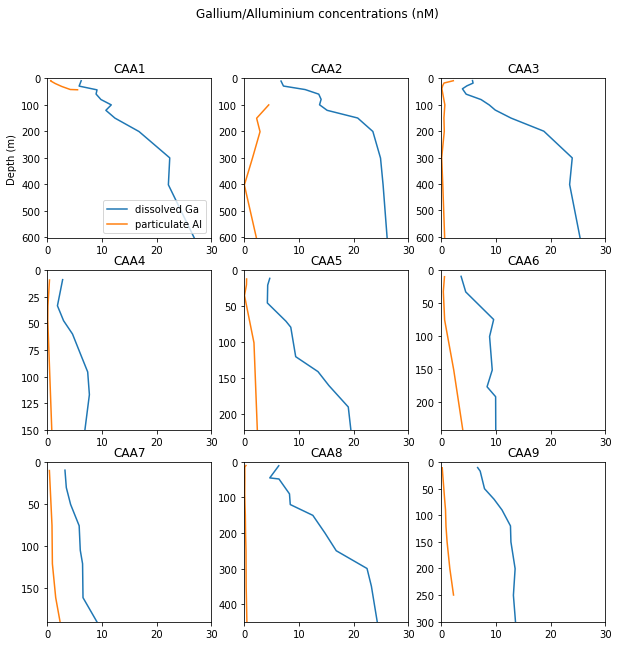

In [44]:
# Setup figure:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Gallium/Alluminium concentrations (nM)')
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))
ax7 = plt.subplot2grid((3, 3), (2, 0))
ax8 = plt.subplot2grid((3, 3), (2, 1))
ax9 = plt.subplot2grid((3, 3), (2, 2))

up_xlim = 30

ax1.invert_yaxis()
ax1.set_title('CAA1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CAA1.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('CAA2')
ax2.set_ylim([max(CAA2.depth), 0])
ax2.set_xlim([0, up_xlim])

ax3.invert_yaxis()
ax3.set_title('CAA3')
ax3.set_ylim([max(CAA3.depth), 0])
ax3.set_xlim([0, up_xlim])

ax4.invert_yaxis()
ax4.set_title('CAA4')
ax4.set_ylim([max(CAA4.depth), 0])
ax4.set_xlim([0, up_xlim])

ax5.invert_yaxis()
ax5.set_title('CAA5')
ax5.set_ylim([max(CAA5.depth), 0])
ax5.set_xlim([0, up_xlim])

ax6.invert_yaxis()
ax6.set_title('CAA6')
ax6.set_ylim([max(CAA6.depth), 0])
ax6.set_xlim([0, up_xlim])

ax7.invert_yaxis()
ax7.set_title('CAA7')
ax7.set_ylim([max(CAA7.depth), 0])
ax7.set_xlim([0, up_xlim])

ax8.invert_yaxis()
ax8.set_title('CAA8')
ax8.set_ylim([max(CAA8.depth), 0])
ax8.set_xlim([0, up_xlim])

ax9.invert_yaxis()
ax9.set_title('CAA9')
ax9.set_ylim([max(CAA9.depth), 0])
ax9.set_xlim([0, up_xlim])

ax1.plot(CAA1.dGa, CAA1.depth,label='dissolved Ga')
ax1.plot([i/100 for i in CAA1.pAl], CAA1.pdepth,label='particulate Al')
ax2.plot(CAA2.dGa, CAA2.depth)
ax2.plot([i/100 for i in CAA2.pAl], CAA2.pdepth,label='particulate')
ax3.plot(CAA3.dGa, CAA3.depth)
ax3.plot([i/100 for i in CAA3.pAl], CAA3.pdepth,label='particulate')
ax4.plot(CAA4.dGa, CAA4.depth)
ax4.plot([i/100 for i in CAA4.pAl], CAA4.pdepth,label='particulate')
ax5.plot(CAA5.dGa, CAA5.depth)
ax5.plot([i/100 for i in CAA5.pAl], CAA5.pdepth,label='particulate')
ax6.plot(CAA6.dGa, CAA6.depth)
ax6.plot([i/100 for i in CAA6.pAl], CAA6.pdepth,label='particulate')
ax7.plot(CAA7.dGa, CAA7.depth)
ax7.plot([i/100 for i in CAA7.pAl], CAA7.pdepth,label='particulate')
ax8.plot(CAA8.dGa, CAA8.depth)
ax8.plot([i/100 for i in CAA8.pAl], CAA8.pdepth,label='particulate')
ax9.plot(CAA9.dGa, CAA9.depth)
ax9.plot([i/100 for i in CAA9.pAl], CAA9.pdepth,label='particulate')

ax1.legend(loc=4)

## Canada Basin:

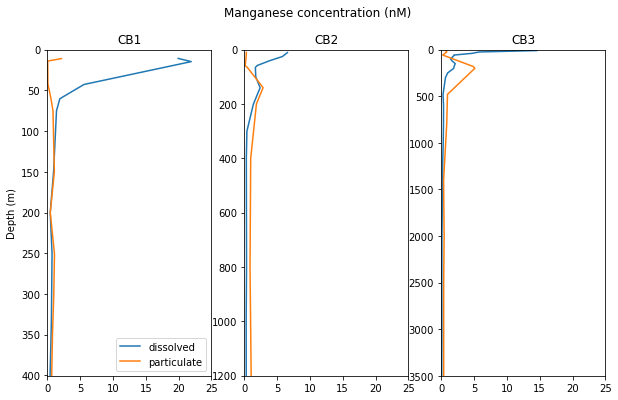

In [47]:
# Setup figure:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Manganese concentration (nM)')
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))

up_xlim = 25

ax1.invert_yaxis()
ax1.set_title('CB1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CB1.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('CB2')
ax2.set_ylim([max(CB2.depth), 0])
ax2.set_xlim([0, up_xlim])

ax3.invert_yaxis()
ax3.set_title('CB3')
ax3.set_ylim([max(CB3.depth), 0])
ax3.set_xlim([0, up_xlim])

ax1.plot(CB1.dMn, CB1.depth, label='dissolved')
ax1.plot([i/1000 for i in CB1.pMn], CB1.pdepth, label='particulate')
ax2.plot(CB2.dMn, CB2.depth)
ax2.plot([i/1000 for i in CB2.pMn], CB2.pdepth, label='particulate')
ax3.plot(CB3.dMn, CB3.depth)
ax3.plot([i/1000 for i in CB3.pMn], CB3.pdepth, label='particulate')

ax1.legend(loc=4)

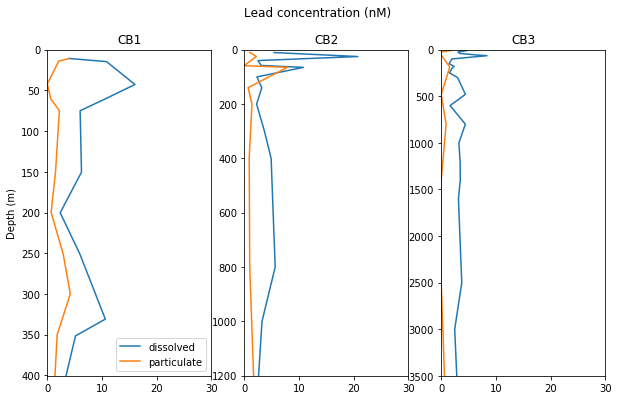

In [48]:
# Setup figure:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Lead concentration (nM)')
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))

up_xlim = 30

ax1.invert_yaxis()
ax1.set_title('CB1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CB1.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('CB2')
ax2.set_ylim([max(CB2.depth), 0])
ax2.set_xlim([0, up_xlim])

ax3.invert_yaxis()
ax3.set_title('CB3')
ax3.set_ylim([max(CB3.depth), 0])
ax3.set_xlim([0, up_xlim])

ax1.plot(CB1.dPb, CB1.depth, label='dissolved')
ax1.plot(CB1.pPb, CB1.pdepth, label='particulate')
ax2.plot(CB2.dPb, CB2.depth)
ax2.plot(CB2.pPb, CB2.pdepth, label='particulate')
ax3.plot(CB3.dPb, CB3.depth)
ax3.plot(CB3.pPb, CB3.pdepth, label='particulate')

ax1.legend(loc=4)

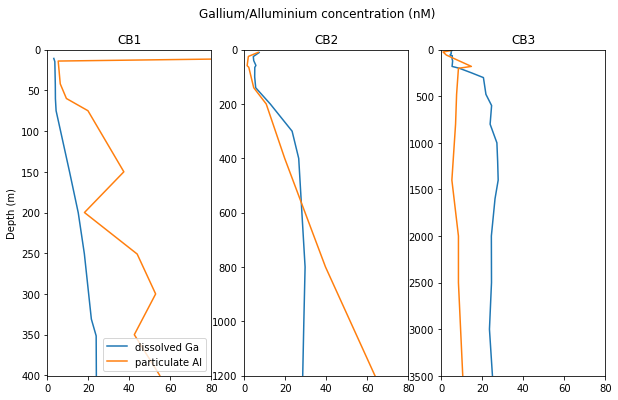

In [49]:
# Setup figure:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Gallium/Alluminium concentration (nM)')
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))

up_xlim = 80

ax1.invert_yaxis()
ax1.set_title('CB1')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(CB1.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('CB2')
ax2.set_ylim([max(CB2.depth), 0])
ax2.set_xlim([0, up_xlim])

ax3.invert_yaxis()
ax3.set_title('CB3')
ax3.set_ylim([max(CB3.depth), 0])
ax3.set_xlim([0, up_xlim])

ax1.plot(CB1.dGa, CB1.depth, label='dissolved Ga')
ax1.plot(CB1.pAl, CB1.pdepth, label='particulate Al')
ax2.plot(CB2.dGa, CB2.depth)
ax2.plot(CB2.pAl, CB2.pdepth, label='particulate')
ax3.plot(CB3.dGa, CB3.depth)
ax3.plot(CB3.pAl, CB3.pdepth, label='particulate')

ax1.legend(loc=4)

## Baffin Bay:

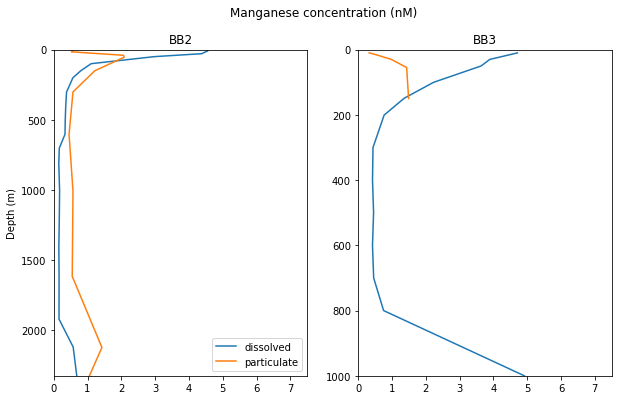

In [39]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Manganese concentration (nM)')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

up_xlim = 7.5

ax1.invert_yaxis()
ax1.set_title('BB2')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(BB2.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('BB3')
ax2.set_ylim([max(BB3.depth), 0])
ax2.set_xlim([0, up_xlim])

ax1.plot(BB2.dMn, BB2.depth, label='dissolved')
ax1.plot([i/1000 for i in BB2.pMn], BB2.pdepth, label='particulate')
ax2.plot(BB3.dMn, BB3.depth)
ax2.plot([i/1000 for i in BB3.pMn], BB3.pdepth, label='particulate')

ax1.legend(loc=4)

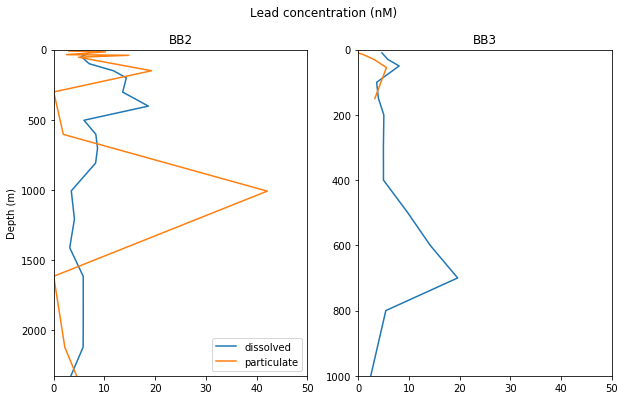

In [38]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Lead concentration (nM)')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

up_xlim = 50

ax1.invert_yaxis()
ax1.set_title('BB2')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(BB2.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('BB3')
ax2.set_ylim([max(BB3.depth), 0])
ax2.set_xlim([0, up_xlim])

ax1.plot(BB2.dPb, BB2.depth, label='dissolved')
ax1.plot(BB2.pPb, BB2.pdepth, label='particulate')
ax2.plot(BB3.dPb, BB3.depth)
ax2.plot(BB3.pPb, BB3.pdepth, label='particulate')

ax1.legend(loc=4)

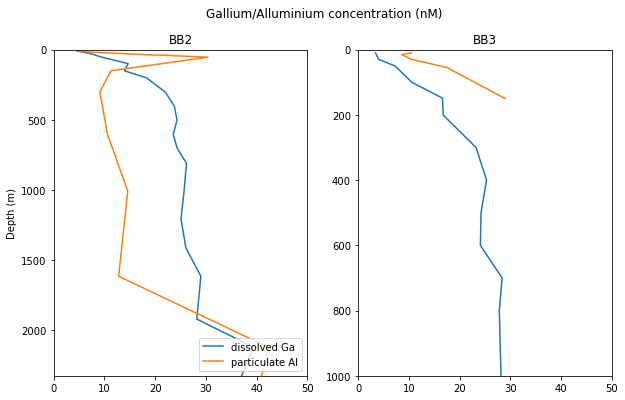

In [35]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Gallium/Alluminium concentration (nM)')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

up_xlim = 50

ax1.invert_yaxis()
ax1.set_title('BB2')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim([max(BB2.depth), 0])
ax1.set_xlim([0, up_xlim])

ax2.invert_yaxis()
ax2.set_title('BB3')
ax2.set_ylim([max(BB3.depth), 0])
ax2.set_xlim([0, up_xlim])

ax1.plot(BB2.dGa, BB2.depth, label='dissolved Ga')
ax1.plot(BB2.pAl, BB2.pdepth, label='particulate Al')
ax2.plot(BB3.dGa, BB3.depth)
ax2.plot(BB3.pAl, BB3.pdepth, label='particulate')

ax1.legend(loc=4)